# **Setup**

In [1]:
import os
import shutil
import cv2
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tqdm import tqdm
from pathlib import Path
from PIL import Image

# **Image Preprocessing**

In [2]:
all_paths_img = ['../dataset/segmentation/image/' + path + '' for path in os.listdir('../dataset/segmentation/image')]
all_paths_masks = ['../dataset/segmentation/mask/' + path + '' for path in os.listdir('../dataset/segmentation/mask')]
all_paths_img_folder = ['../dataset/base/image/' + path + '/' for path in os.listdir('../dataset/base/image')]
all_paths_masks_folder = ['../dataset/base/mask/' + path + '/' for path in os.listdir('../dataset/base/mask')]

all_class_names = [path.split('/')[-2] for path in all_paths_img_folder]

In [119]:
for img_path in tqdm(all_paths_img):
    image = cv2.imread(img_path)
    resized_image = cv2.resize(image, (864, 576))
    cv2.imwrite(img_path, resized_image)
    
for mask_path in tqdm(all_paths_masks):
    mask = cv2.imread(mask_path)
    resized_mask = cv2.resize(mask, (864, 576))
    cv2.imwrite(mask_path, resized_mask)
    
len(all_paths_img), len(all_paths_masks)

100%|██████████| 560/560 [01:58<00:00,  4.74it/s]


(560, 560)

In [ ]:
def find_class_name(image_name, class_names):
    for class_name in class_names:
        if class_name in image_name:
            return class_name
    return None

def copy_files_to_class_folder(base_path, unlabeled_path, class_names):
    for image_file in os.listdir(unlabeled_path):
        image_name = Path(image_file).stem
        class_name = find_class_name(image_name, class_names)
        
        if class_name:
            class_base_folder = base_path / class_name
            class_base_folder.mkdir(parents=True, exist_ok=True)
            
            src_image_path = unlabeled_path / image_file
            dst_image_path = class_base_folder / image_file
            
            shutil.copy(src_image_path, dst_image_path)

base_image = Path('../dataset/base/image')
base_mask = Path('../dataset/base/mask')
unlabeled_image = Path('../dataset/segmentation/image')
unlabeled_mask = Path('../dataset/segmentation/mask')

copy_files_to_class_folder(base_image, unlabeled_image, all_class_names)
copy_files_to_class_folder(base_mask, unlabeled_mask, all_class_names)

In [144]:
def get_image_per_class(base):
    total_class = 0
    for class_name in all_class_names:
        class_base_folder = base / class_name
        print(f'Jumlah Image {class_name}: {len(os.listdir(class_base_folder))}')
        total_class += len(os.listdir(class_base_folder))
    print("Jumlah total Image: ", total_class)
    print("\n")
        
get_image_per_class(base_image)
get_image_per_class(base_mask)

Jumlah Image Achnanthes sp: 21
Jumlah Image Bacteriastrum delicatulum: 28
Jumlah Image Bleakeleya notata: 14
Jumlah Image Chaetoceros affinis: 21
Jumlah Image Chaetoceros diversus: 14
Jumlah Image Chaetoceros peruvianus: 7
Jumlah Image Coscinodiscus oculus-iridis: 7
Jumlah Image Diatom: 35
Jumlah Image Guinardia flaccida: 14
Jumlah Image Hemiaulus hauckii: 7
Jumlah Image Hemiaulus membranaceus: 14
Jumlah Image Mastogloia sp: 28
Jumlah Image Nitzschia: 28
Jumlah Image Nitzschia longissima: 7
Jumlah Image Plagiotropis lepidoptera: 28
Jumlah Image Pleurosigma: 7
Jumlah Image Proboscia alata: 7
Jumlah Image Proboscia indica: 35
Jumlah Image Pseudo-nitzschia spp: 28
Jumlah Image Pseudosolenia calcar-avis: 21
Jumlah Image Rhizosolenia calcar-avis: 14
Jumlah Image Rhizosolenia cochlea: 21
Jumlah Image Rhizosolenia imbricata: 70
Jumlah Image Tetramphora (Amphora) decussata: 21
Jumlah Image Thalassionema nitzschioides: 14
Jumlah Image Toxarium undulatum: 49
Jumlah total Image:  560


Jumlah Ima

In [18]:
def convert_tiff_to_jpg(paths: list, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if filename.endswith('.tiff'):
                    file_path = os.path.join(path, filename)
                    im = Image.open(file_path)
                    im.save(file_path.replace('.tiff', '.jpg'))
                
def move_tiff_to_tiff_folder(paths: list, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if filename.endswith('.tiff'):
                    file_path = os.path.join(path, filename)
                    shutil.move(file_path, 'img/tiff')
                
convert_tiff_to_jpg(all_paths_img)
move_tiff_to_tiff_folder(all_paths_img)

In [ ]:
def convert_png_to_jpg(paths: list, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if filename.endswith('.png'):
                    file_path = os.path.join(path, filename)
                    im = Image.open(file_path)
                    im.save(file_path.replace('.png', '.jpg'))

convert_png_to_jpg(all_paths_img)                        
convert_png_to_jpg(all_paths_masks)

In [ ]:
def move_png_to_png_folder(paths: list, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if filename.endswith('.png'):
                    file_path = os.path.join(path, filename)
                    shutil.move(file_path, 'png')

move_png_to_png_folder(all_paths_img)
move_png_to_png_folder(all_paths_masks)

In [115]:
def copy_all_image_to_segmentation_image(base, segmentation):
    for class_name in all_class_names:
        class_base_folder = base / class_name
        for image_file in os.listdir(class_base_folder):
            src_image_path = class_base_folder / image_file
            dst_image_path = segmentation / image_file
            shutil.copy(src_image_path, dst_image_path)
            
copy_all_image_to_segmentation_image(base_image, unlabeled_image)
copy_all_image_to_segmentation_image(base_mask, unlabeled_mask)

# **Image Augmentation**

## **Geometric Transform**

In [89]:
def shift_scale_rotate_image(paths: list):
    for path in paths:
        for filename in os.listdir(path):
            if re.match(r'.*\d+\.jpg$', filename):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                rows, cols, ch = image.shape
                M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
                dst = cv2.warpAffine(image, M, (cols, rows))
                cv2.imwrite(file_path.replace('.jpg', '_scale.jpg'), dst)

def vertical_flip_image(paths: list):
    for path in paths:
        for filename in os.listdir(path):
            if re.match(r'.*\d+\.jpg$', filename):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                dst = cv2.flip(image, 0)
                cv2.imwrite(file_path.replace('.jpg', '_vertical.jpg'), dst)

def horizontal_flip_image(paths: list):
    for path in paths:
        for filename in os.listdir(path):
            if re.match(r'.*\d+\.jpg$', filename):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                dst = cv2.flip(image, 1)
                cv2.imwrite(file_path.replace('.jpg', '_horizontal.jpg'), dst)

def zoom_in_image(paths: list):
    for path in paths:
        for filename in os.listdir(path):
            if re.match(r'.*\d+\.jpg$', filename):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                rows, cols, ch = image.shape
                M = cv2.getRotationMatrix2D((cols/2, rows/2), 0, 1.2)
                dst = cv2.warpAffine(image, M, (cols, rows))
                cv2.imwrite(file_path.replace('.jpg', '_zoom.jpg'), dst)

def rotate_image(paths: list):
    for path in paths:
        for filename in os.listdir(path):
            if re.match(r'.*\d+\.jpg$', filename):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                rows, cols, ch = image.shape
                M = cv2.getRotationMatrix2D((cols/2, rows/2), 180, 1)
                dst = cv2.warpAffine(image, M, (cols, rows))
                cv2.imwrite(file_path.replace('.jpg', '_rotate.jpg'), dst)

def apply_geometry_transformations(paths: list, next: bool = False):
    if next:
        shift_scale_rotate_image(paths)
        vertical_flip_image(paths)
        horizontal_flip_image(paths)
        zoom_in_image(paths)
        rotate_image(paths)                    

apply_geometry_transformations(all_paths_img_folder, True)
apply_geometry_transformations(all_paths_masks_folder, True)

## **Distortion Transform**

In [9]:
def shear_distortion_image(paths: list, shear_factor: float = 0.2, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if re.match(r'.*\d+\.jpg$', filename):
                    file_path = os.path.join(path, filename)
                    image = cv2.imread(file_path) 
                    rows, cols, ch = image.shape
                    
                    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])                 
                    dst = cv2.warpAffine(image, M, (cols, rows))
                    
                    cv2.imwrite(file_path.replace('.jpg', '_shear_distortion.jpg'), dst)

shear_distortion_image(all_paths_img_folder, shear_factor=0.2, next=True)
shear_distortion_image(all_paths_masks_folder, shear_factor=0.2, next=True)

## **Blur and Smothing Transform**

In [91]:
def blur_image(paths: list, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if re.match(r'.*\d+\.jpg$', filename):
                    file_path = os.path.join(path, filename)
                    image = cv2.imread(file_path)
                    dst = cv2.GaussianBlur(image, (5, 5), 0)
                    cv2.imwrite(file_path.replace('.jpg', '_blur.jpg'), dst)
                    
blur_image(all_paths_img_folder, True)
blur_image(all_paths_masks_folder, True)

## **Optional Deleted Image**

In [43]:
def delete_images(paths: list, contains: str = None, next: bool = False):
    if next:
        for path in paths:
            for filename in os.listdir(path):
                if contains in filename:
                    file_path = os.path.join(path, filename)
                    os.remove(file_path)
                    
delete_images(all_paths_img_folder, 'rotated', True)
delete_images(all_paths_masks_folder, 'rotated', True)

# **Image Preprocessing Classification**

## **Detect Contours**

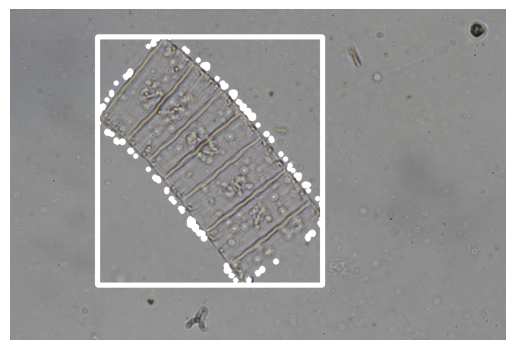

In [16]:
def detect_contours(img_path: str, mask_path: str):
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path, 0)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 7)
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.imshow(mask_rgb, alpha=0.5)
    plt.axis('off')
    plt.show()

img_image = '../dataset/segmentation/image/Achnanthes sp 1.jpg'
mask_image = '../dataset/segmentation/mask/Achnanthes sp 1.jpg'
detect_contours(img_image, mask_image)

(-0.5, 863.5, 575.5, -0.5)

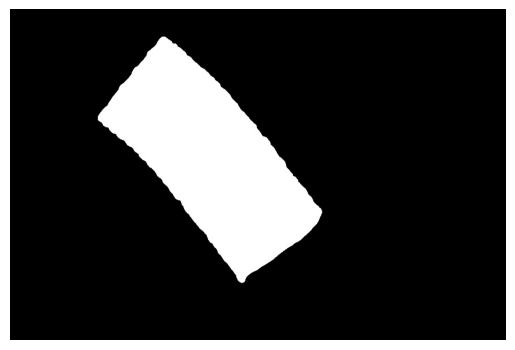

In [15]:
plt.imshow(cv2.imread(mask_image))
plt.axis('off')

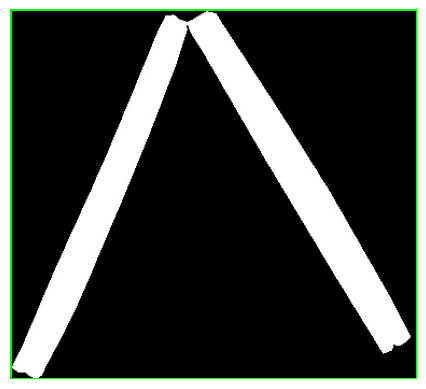

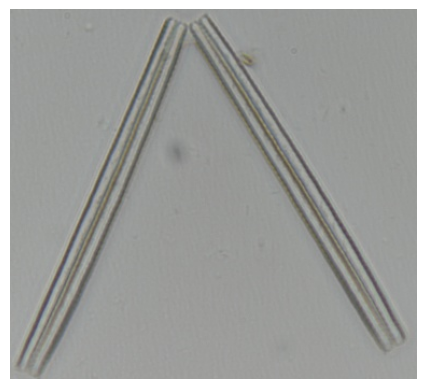

In [160]:
def display_roi_image(image, show_image: bool = True):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    largest_contour = None
    largest_area = 0
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > largest_area:
            largest_area = area
            largest_contour = contour
    
    if largest_contour is not None:
        x, y, w, h = cv2.boundingRect(largest_contour)
        roi = image[y:y+h, x:x+w] 
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        if show_image:
            plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
        
        return (x, y, w, h)
    else:
        print("Tidak ada kontur yang ditemukan.")
        return None

img_image = cv2.imread('../dataset/segmentation\image\Thalassionema nitzschioides 2.jpg')
mask_image = cv2.imread('../dataset/segmentation\mask\Thalassionema nitzschioides 2.jpg')
x, y, w, h = display_roi_image(mask_image)

roi = img_image[y:y+h, x:x+w]
plt.axis('off')
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

## **Contours DataFrame**

In [164]:
def convert_roi_to_dataframe(paths: list, next: bool = False):
    if next:
        roi_images = []
        for path in paths:
            for filename in os.listdir(path):
                file_path = os.path.join(path, filename)
                image = cv2.imread(file_path)
                x, y, w, h = display_roi_image(image, show_image=False)
                if x is not None:
                    roi_images.append({
                        'image_name': filename,
                        'x': x,
                        'y': y,
                        'w': w,
                        'h': h
                    })
        
        df = pd.DataFrame(roi_images)
        df.to_csv('roi_images.csv', index=False)
        
convert_roi_to_dataframe(all_paths_masks_folder, True)

## **Save ROI Image**

In [147]:
def manage_path(next: bool = False):
    if next:
        shutil.rmtree('../dataset/classification')

        Path('../dataset/classification').mkdir(parents=True, exist_ok=True)

        for path in all_paths_img_folder:
            Path('../dataset/classification/' + path.split('/')[-2]).mkdir(parents=True, exist_ok=True)
            
manage_path(True)

In [149]:
all_paths_img_cropped = ['../dataset/classification/training_validation' + path + '/' for path in os.listdir('../dataset/classification/training_validation')]

In [148]:
def cut_roi_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    largest_contour = None
    largest_area = 0
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        if area > largest_area:
            largest_area = area
            largest_contour = contour
    
    if largest_contour is not None:
        x, y, w, h = cv2.boundingRect(largest_contour)
        return (x, y, w, h)
    else:
        print("Tidak ada kontur yang ditemukan.")
        return None

def crop_images(img_paths: list, img_masks: list, path_to_save: str = 'classification/training_validation'):
    for img_path, mask_path in tqdm(zip(img_paths, img_masks), total=len(img_paths), desc="Processing images"):
        class_name = os.path.basename(os.path.normpath(img_path))
        for filename in os.listdir(mask_path):
            mask_file_path = os.path.join(mask_path, filename)
            img_file_path = os.path.join(img_path, filename)
            
            if os.path.exists(img_file_path):
                mask = cv2.imread(mask_file_path)
                img = cv2.imread(img_file_path)
                roi_coords = cut_roi_image(mask)
                
                if roi_coords:
                    x, y, w, h = roi_coords
                    roi = img[y:y+h, x:x+w]
                    
                    save_dir = os.path.join(path_to_save, class_name)
                    os.makedirs(save_dir, exist_ok=True)
                    save_path = os.path.join(save_dir, filename)
                    cv2.imwrite(save_path, roi)

crop_images(all_paths_img_folder, all_paths_masks_folder, path_to_save='../dataset/classification/training_validation')         

Processing images: 100%|██████████| 26/26 [00:32<00:00,  1.26s/it]


In [150]:
def count_all_images(paths: list):
    total = 0
    for path in paths:
        total += len(os.listdir(path))
    return total

print(count_all_images(all_paths_masks_folder))
print(count_all_images(all_paths_img_folder))
print(count_all_images(all_paths_img_cropped))

560
560
560


# **Image Preprocessing Segmentation**

In [2]:
all_paths_img = ['../dataset/segmentation/image' + path + '/' for path in os.listdir('../dataset/segmentation/image')]
all_paths_masks = ['../dataset/segmentation/mask/' + path + '/' for path in os.listdir('../dataset/segmentation/mask')]    
image_segmentation = '../dataset/segmentation/image'
mask_segmentation = '../dataset/segmentation/mask'

In [33]:
for path in all_paths_masks:
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        shutil.move(file_path, mask_segmentation)

for path in all_paths_img:
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        shutil.move(file_path, image_segmentation)

In [34]:
shutil.rmtree('image')
shutil.rmtree('masks')
Path('image').mkdir(parents=True, exist_ok=True)
Path('masks').mkdir(parents=True, exist_ok=True)

In [13]:
for path in all_paths_img:
    class_name = path.split('/')[1]
    for filename in os.listdir(image_segmentation):
        if class_name in filename:
            file_path = os.path.join(image_segmentation, filename)
            shutil.copy(file_path, path)
            
for path in all_paths_masks:
    class_name = path.split('/')[1]
    for filename in os.listdir(mask_segmentation):
        if class_name in filename:
            file_path = os.path.join(mask_segmentation, filename)
            shutil.copy(file_path, path)

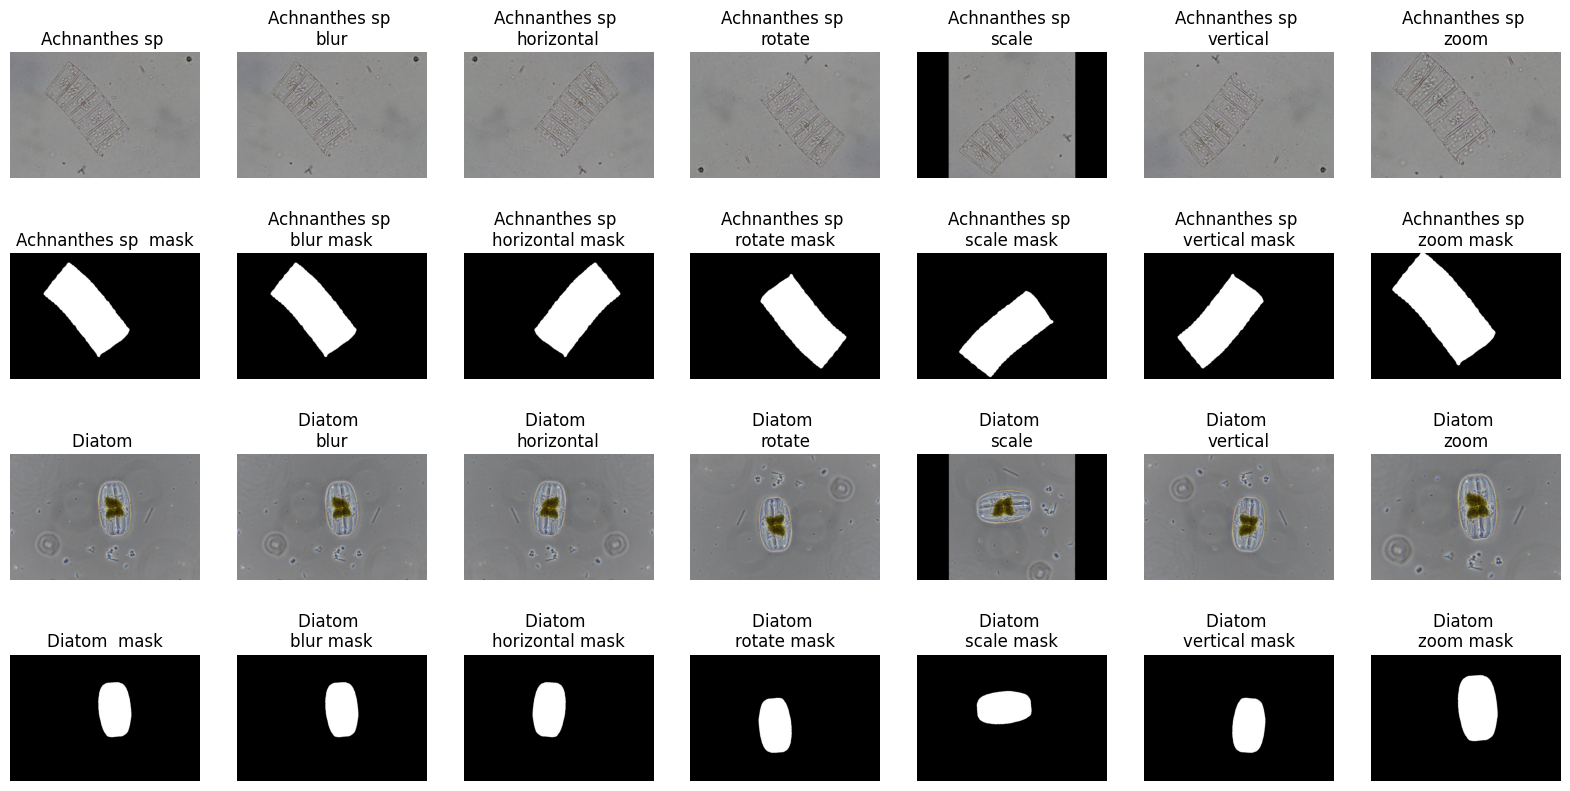

In [22]:
ACHNANTHES_SP_1 = '../dataset/base/image/Achnanthes sp/'
ACHNATHES_SP_1_MASK = '../dataset/base/mask/Achnanthes sp/'
DIATOM_1 = '../dataset/base/image/Diatom/'
DIATOM_1_MASK = '../dataset/base/mask/Diatom/'

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(20, 10))

for i, filename in enumerate(os.listdir(ACHNANTHES_SP_1)):
    if 'Achnanthes sp 1' in filename:
        img = cv2.imread(os.path.join(ACHNANTHES_SP_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[0, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[0, i].axis('off')
        
for i, filename in enumerate(os.listdir(ACHNATHES_SP_1_MASK)):
    if 'Achnanthes sp 1' in filename:
        img = cv2.imread(os.path.join(ACHNATHES_SP_1_MASK, filename))
        img = cv2.resize(img, (864, 576))
        ax[1, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[1, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')) + ' mask')
        ax[1, i].axis('off')
        
for i, filename in enumerate(os.listdir(DIATOM_1)):
    if 'Diatom 1' in filename:
        img = cv2.imread(os.path.join(DIATOM_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[2, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[2, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[2, i].axis('off')
        
for i, filename in enumerate(os.listdir(DIATOM_1_MASK)):
    if 'Diatom 1' in filename:
        img = cv2.imread(os.path.join(DIATOM_1_MASK, filename))
        img = cv2.resize(img, (864, 576))
        ax[3, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[3, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')) + ' mask')
        ax[3, i].axis('off')

# plt.subplots_adjust(wspace=0.2)
plt.show()

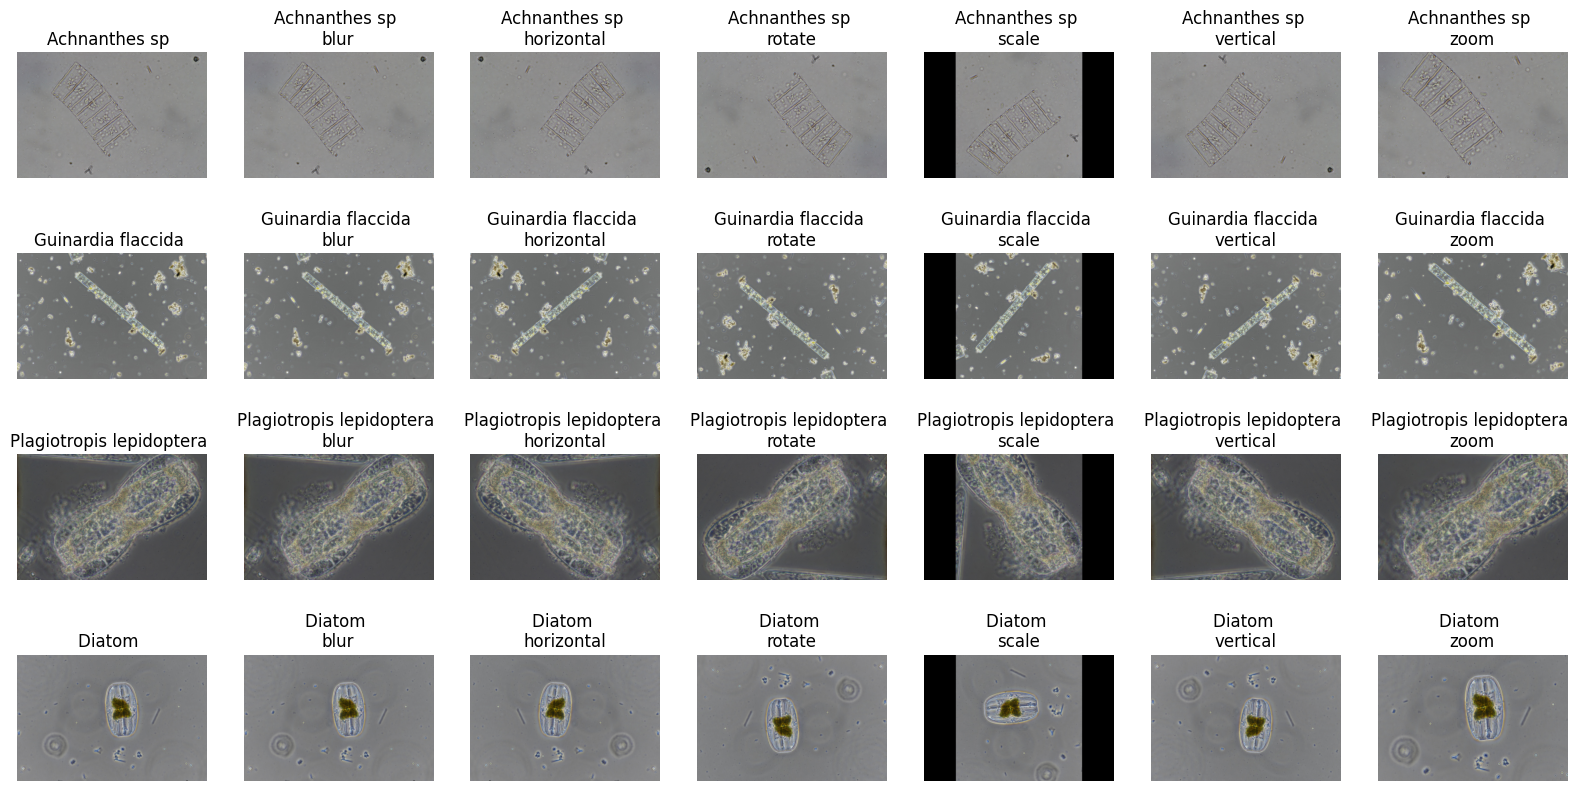

In [12]:
ACHNANTHES_SP_1 = '../dataset/base/image/Achnanthes sp/'
GUINARDIA_FLACCIDA_1 = '../dataset/base/image/Guinardia flaccida/'
PLAGIOTROPIS_LEPIDOPTERA_1 = '../dataset/base/image/Plagiotropis lepidoptera/'
DIATOM_1 = '../dataset/base/image/Diatom/'

fig, ax = plt.subplots(nrows=4, ncols=7, figsize=(20, 10))

for i, filename in enumerate(os.listdir(ACHNANTHES_SP_1)):
    if 'Achnanthes sp 1' in filename:
        img = cv2.imread(os.path.join(ACHNANTHES_SP_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[0, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[0, i].axis('off')
        
for i, filename in enumerate(os.listdir(GUINARDIA_FLACCIDA_1)):
    if 'Guinardia flaccida 1' in filename:
        img = cv2.imread(os.path.join(GUINARDIA_FLACCIDA_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[1, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[1, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[1, i].axis('off')
        
for i, filename in enumerate(os.listdir(PLAGIOTROPIS_LEPIDOPTERA_1)):
    if 'Plagiotropis lepidoptera 1' in filename:
        img = cv2.imread(os.path.join(PLAGIOTROPIS_LEPIDOPTERA_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[2, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[2, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[2, i].axis('off')
        
for i, filename in enumerate(os.listdir(DIATOM_1)):
    if 'Diatom 1' in filename:
        img = cv2.imread(os.path.join(DIATOM_1, filename))
        img = cv2.resize(img, (864, 576))
        ax[3, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[3, i].set_title("\n".join(" ".join(filename.split('.')[0].split(' 1')).split('_')))
        ax[3, i].axis('off')

# plt.subplots_adjust(wspace=0.2)
plt.show()

In [17]:
for filename in os.listdir(image_segmentation):
    file_path = os.path.join(image_segmentation, filename)
    os.remove(file_path)
    
for filename in os.listdir(mask_segmentation):
    file_path = os.path.join(mask_segmentation, filename)
    os.remove(file_path)

# **Augment Testing Data**

In [152]:
TEST_PATH = Path("../dataset/classification/testing")
TRAIN_VAL_PATH = Path("../dataset/classification/training_validation")

all_paths_img = [TRAIN_VAL_PATH / path for path in os.listdir(TRAIN_VAL_PATH) if (TRAIN_VAL_PATH / path).is_dir()]

In [154]:
def augment_image(image):
    rows, cols = image.shape[:2]
    angle = random.choice([0, 180])
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    flipped = cv2.flip(rotated, random.choice([-1, 0, 1]))
    return flipped

for class_path in all_paths_img:
    class_name = class_path.name
    class_test_path = TEST_PATH / class_name
    
    class_test_path.mkdir(parents=True, exist_ok=True)
    
    images = [img for img in class_path.glob("*.jpg")]
    
    for i in range(np.random.randint(3, 5)):
        img_path = random.choice(images)
        image = cv2.imread(str(img_path))
        
        augmented_image = augment_image(image)
        
        output_path = class_test_path / f"{class_name}_{i+1}.jpg"
        cv2.imwrite(str(output_path), augmented_image)

    print(f"Augmentasi untuk {class_name} selesai.")

Augmentasi untuk Achnanthes sp selesai.
Augmentasi untuk Bacteriastrum delicatulum selesai.
Augmentasi untuk Bleakeleya notata selesai.
Augmentasi untuk Chaetoceros affinis selesai.
Augmentasi untuk Chaetoceros diversus selesai.
Augmentasi untuk Chaetoceros peruvianus selesai.
Augmentasi untuk Coscinodiscus oculus-iridis selesai.
Augmentasi untuk Diatom selesai.
Augmentasi untuk Guinardia flaccida selesai.
Augmentasi untuk Hemiaulus hauckii selesai.
Augmentasi untuk Hemiaulus membranaceus selesai.
Augmentasi untuk Mastogloia sp selesai.
Augmentasi untuk Nitzschia selesai.
Augmentasi untuk Nitzschia longissima selesai.
Augmentasi untuk Plagiotropis lepidoptera selesai.
Augmentasi untuk Pleurosigma selesai.
Augmentasi untuk Proboscia alata selesai.
Augmentasi untuk Proboscia indica selesai.
Augmentasi untuk Pseudo-nitzschia spp selesai.
Augmentasi untuk Pseudosolenia calcar-avis selesai.
Augmentasi untuk Rhizosolenia calcar-avis selesai.
Augmentasi untuk Rhizosolenia cochlea selesai.
Aug

In [153]:
for class_path in all_paths_img:
    class_name = class_path.name
    class_test_path = TEST_PATH / class_name
    
    for img_path in class_test_path.glob("*.jpg"):
        os.remove(str(img_path))
        
    print(f"File gambar di folder {class_test_path} berhasil dihapus.")

File gambar di folder ..\img\testing\Achnanthes sp berhasil dihapus.
File gambar di folder ..\img\testing\Bacteriastrum delicatulum berhasil dihapus.
File gambar di folder ..\img\testing\Bleakeleya notata berhasil dihapus.
File gambar di folder ..\img\testing\Chaetoceros affinis berhasil dihapus.
File gambar di folder ..\img\testing\Chaetoceros diversus berhasil dihapus.
File gambar di folder ..\img\testing\Chaetoceros peruvianus berhasil dihapus.
File gambar di folder ..\img\testing\Coscinodiscus oculus-iridis berhasil dihapus.
File gambar di folder ..\img\testing\Diatom berhasil dihapus.
File gambar di folder ..\img\testing\Guinardia flaccida berhasil dihapus.
File gambar di folder ..\img\testing\Hemiaulus hauckii berhasil dihapus.
File gambar di folder ..\img\testing\Hemiaulus membranaceus berhasil dihapus.
File gambar di folder ..\img\testing\Mastogloia sp berhasil dihapus.
File gambar di folder ..\img\testing\Nitzschia berhasil dihapus.
File gambar di folder ..\img\testing\Nitzsch

In [155]:
for class_path in all_paths_img:
    class_name = class_path.name
    class_test_path = TEST_PATH / class_name
    total_images = len(list(class_test_path.glob("*.jpg")))
    
    print(f"Total gambar di folder {class_test_path}: {total_images}")
    
total_images = sum([len(list(class_test_path.glob("*.jpg"))) for class_test_path in TEST_PATH.iterdir()])
print(f"Total gambar di folder testing: {total_images}")

Total gambar di folder ..\img\testing\Achnanthes sp: 3
Total gambar di folder ..\img\testing\Bacteriastrum delicatulum: 4
Total gambar di folder ..\img\testing\Bleakeleya notata: 4
Total gambar di folder ..\img\testing\Chaetoceros affinis: 4
Total gambar di folder ..\img\testing\Chaetoceros diversus: 3
Total gambar di folder ..\img\testing\Chaetoceros peruvianus: 3
Total gambar di folder ..\img\testing\Coscinodiscus oculus-iridis: 3
Total gambar di folder ..\img\testing\Diatom: 3
Total gambar di folder ..\img\testing\Guinardia flaccida: 3
Total gambar di folder ..\img\testing\Hemiaulus hauckii: 4
Total gambar di folder ..\img\testing\Hemiaulus membranaceus: 3
Total gambar di folder ..\img\testing\Mastogloia sp: 4
Total gambar di folder ..\img\testing\Nitzschia: 4
Total gambar di folder ..\img\testing\Nitzschia longissima: 4
Total gambar di folder ..\img\testing\Plagiotropis lepidoptera: 4
Total gambar di folder ..\img\testing\Pleurosigma: 4
Total gambar di folder ..\img\testing\Probosc